
### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

#### Reading Data

In [2]:
data=pd.read_excel("solar radiation dataset.xlsx")
data.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [3]:
data.rename(columns={"Data":"Date"},inplace=True)

In [4]:
data.shape

(32686, 11)

#### Data Exploration and Data Visualization

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Date                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [6]:
data.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [7]:
data.isnull().sum()

UNIXTime                  0
Date                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [8]:
data.dtypes

UNIXTime                    int64
Date                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

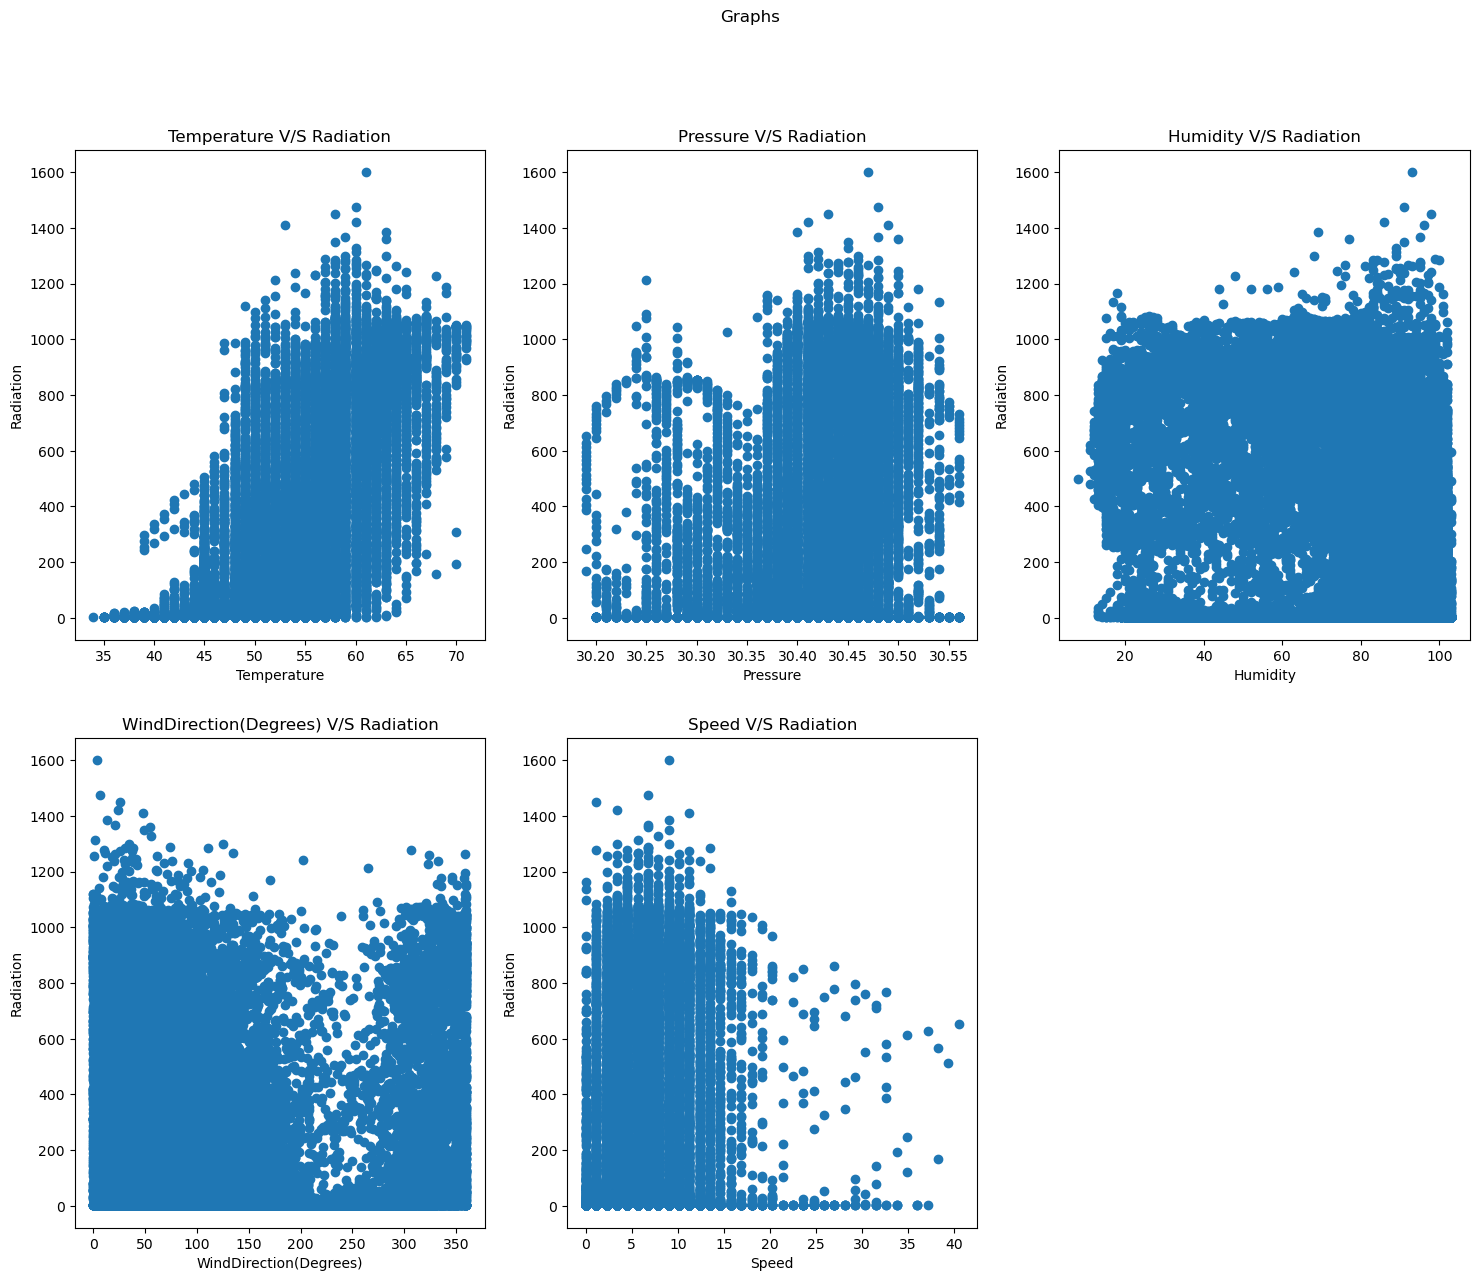

In [9]:
plt.figure(figsize=(18,14))
plt.suptitle("Graphs")
plt.subplot(2,3,1)   
plt.scatter(data["Temperature"],data["Radiation"])
plt.title("Temperature V/S Radiation")
plt.xlabel('Temperature')
plt.ylabel('Radiation')
plt.subplot(2,3,2)   
plt.scatter(data["Pressure"],data["Radiation"])
plt.title("Pressure V/S Radiation")
plt.xlabel('Pressure')
plt.ylabel('Radiation')
plt.subplot(2,3,3)   
plt.scatter(data["Humidity"],data["Radiation"])
plt.title("Humidity V/S Radiation")
plt.xlabel('Humidity')
plt.ylabel('Radiation')
plt.subplot(2,3,4)   
plt.scatter(data["WindDirection(Degrees)"],data["Radiation"])
plt.title("WindDirection(Degrees) V/S Radiation")
plt.xlabel('WindDirection(Degrees)')
plt.ylabel('Radiation')
plt.subplot(2,3,5)   
plt.scatter(data["Speed"],data["Radiation"])
plt.title("Speed V/S Radiation")
plt.xlabel('Speed')
plt.ylabel('Radiation')
plt.show()

#### Extracting Month and Day from data

In [10]:
data["Date"]=pd.to_datetime(data["Date"])

In [11]:
data["month"]=data["Date"].dt.month
data["day"]=data["Date"].dt.day

#### EXtracting the "Hours,Minutes"  from Time,TimeSunSet and TimeSunRise

In [12]:
data["Time"]=pd.to_datetime(data["Time"],format="%H:%M:%S")
data["TimeSunSet"]=pd.to_datetime(data["TimeSunSet"],format="%H:%M:%S")
data["TimeSunRise"]=pd.to_datetime(data["TimeSunRise"],format="%H:%M:%S")

In [13]:
data["Hour"]=pd.DatetimeIndex(data["Time"]).hour
data["Minute"]=pd.DatetimeIndex(data["Time"]).minute
data["RiseHour"]=pd.DatetimeIndex(data["TimeSunRise"]).hour
data["RiseMinute"]=pd.DatetimeIndex(data["TimeSunRise"]).minute
data["SetHour"]=pd.DatetimeIndex(data["TimeSunSet"]).hour
data["SetMinute"]=pd.DatetimeIndex(data["TimeSunSet"]).minute

data.head()

,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,month,day,Hour,Minute,RiseHour,RiseMinute,SetHour,SetMinute
0,1475229326,2016-09-29,1900-01-01 23:55:26,1.21,48,30.46,59,177.39,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00,9,29,23,55,6,13,18,13
1,1475229023,2016-09-29,1900-01-01 23:50:23,1.21,48,30.46,58,176.78,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,9,29,23,50,6,13,18,13
2,1475228726,2016-09-29,1900-01-01 23:45:26,1.23,48,30.46,57,158.75,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,9,29,23,45,6,13,18,13
3,1475228421,2016-09-29,1900-01-01 23:40:21,1.21,48,30.46,60,137.71,3.37,1900-01-01 06:13:00,1900-01-01 18:13:00,9,29,23,40,6,13,18,13
4,1475228124,2016-09-29,1900-01-01 23:35:24,1.17,48,30.46,62,104.95,5.62,1900-01-01 06:13:00,1900-01-01 18:13:00,9,29,23,35,6,13,18,13


In [14]:
plt.figure(figsize=(10,6),dpi=150)
data.corr()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month,day,Hour,Minute,RiseHour,RiseMinute,SetHour,SetMinute
UNIXTime,1.000000,-0.081286,-0.369169,-0.332016,-0.063117,0.152613,0.173860,0.424838,0.328674,0.001056,0.000406,NaN,0.981908,-0.818884,0.586612
Radiation,-0.081286,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627,0.019264,0.026987,0.004398,-0.000730,NaN,-0.092850,0.048719,-0.039816
Temperature,-0.369169,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458,-0.102237,-0.168731,0.197464,-0.001934,NaN,-0.380968,0.300920,-0.242881
Pressure,-0.332016,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639,-0.090498,-0.045287,0.091069,0.001860,NaN,-0.380399,0.151939,-0.119599
Humidity,-0.063117,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624,-0.051703,0.031208,0.077899,0.000499,NaN,-0.023955,0.145143,-0.119526
WindDirection(Degrees),0.152613,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092,0.042979,-0.095717,-0.077969,-0.000602,NaN,0.176929,-0.078540,0.070030
Speed,0.173860,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000,0.124347,0.117697,-0.057939,0.000192,NaN,0.167075,-0.159384,0.119926
month,0.424838,0.019264,-0.102237,-0.090498,-0.051703,0.042979,0.124347,1.000000,0.515611,-0.003281,0.000010,NaN,0.421921,-0.324758,0.254900
day,0.328674,0.026987,-0.168731,-0.045287,0.031208,-0.095717,0.117697,0.515611,1.000000,-0.009619,-0.000229,NaN,0.312197,-0.315487,0.310890
Hour,0.001056,0.004398,0.197464,0.091069,0.077899,-0.077969,-0.057939,-0.003281,-0.009619,1.000000,-0.004052,NaN,-0.006772,0.008629,-0.007056


<Figure size 1500x900 with 0 Axes>

#### delete unwanted columns

In [15]:
data=data.drop(columns=["Time","UNIXTime","Date","TimeSunSet","TimeSunRise","RiseHour"],axis=1)
data.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month,day,Hour,Minute,RiseMinute,SetHour,SetMinute
0,1.21,48,30.46,59,177.39,5.62,9,29,23,55,13,18,13
1,1.21,48,30.46,58,176.78,3.37,9,29,23,50,13,18,13
2,1.23,48,30.46,57,158.75,3.37,9,29,23,45,13,18,13
3,1.21,48,30.46,60,137.71,3.37,9,29,23,40,13,18,13
4,1.17,48,30.46,62,104.95,5.62,9,29,23,35,13,18,13


#### check datatype of all features

In [16]:
data.dtypes

Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
month                       int64
day                         int64
Hour                        int64
Minute                      int64
RiseMinute                  int64
SetHour                     int64
SetMinute                   int64
dtype: object

#### Modelling

In [17]:
x=data.drop("Radiation",axis=1)
y=data["Radiation"].apply(lambda x:int(x*100))

In [18]:
x

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month,day,Hour,Minute,RiseMinute,SetHour,SetMinute
0,48,30.46,59,177.39,5.62,9,29,23,55,13,18,13
1,48,30.46,58,176.78,3.37,9,29,23,50,13,18,13
2,48,30.46,57,158.75,3.37,9,29,23,45,13,18,13
3,48,30.46,60,137.71,3.37,9,29,23,40,13,18,13
4,48,30.46,62,104.95,5.62,9,29,23,35,13,18,13
...,...,...,...,...,...,...,...,...,...,...,...,...
32681,44,30.43,102,145.42,6.75,1,12,0,20,41,17,42
32682,44,30.42,102,117.78,6.75,1,12,0,15,41,17,42
32683,44,30.42,102,145.19,9.00,1,12,0,10,41,17,42
32684,44,30.42,101,164.19,7.87,1,12,0,5,41,17,42


In [19]:
y

0        121
1        121
2        123
3        121
4        117
        ... 
32681    122
32682    117
32683    120
32684    123
32685    120
Name: Radiation, Length: 32686, dtype: int64

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=101)

In [21]:
scaler=StandardScaler()

In [22]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

##### GridsearchCV

In [23]:
model_params={"random_forest":{"model":RandomForestRegressor(),"params":{"n_estimators":[1,5,10,100,200]}},
             "decision":{"model":DecisionTreeRegressor(),"params":{"max_depth":[1,5,10,30,40]}},
             "gradientboosting":{"model":GradientBoostingRegressor(),"params":{"n_estimators":[3,4,8,10,12]}}}

In [24]:
score=[]
models=["random_forest","decision","gradientboosting"]
for model_name in models:   
    mp=model_params[model_name]  
    gds=GridSearchCV(mp["model"],mp["params"],cv=5,return_train_score=True)
    gds.fit(x_train,y_train)
    score.append({"model":model_name,"best_score":gds.best_score_,"best_params":gds.best_params_})

##### Model Evaluation

In [25]:
pd.DataFrame(score)

,model,best_score,best_params
0,random_forest,0.934989,{'n_estimators': 200}
1,decision,0.896916,{'max_depth': 10}
2,gradientboosting,0.726346,{'n_estimators': 12}


#### Since RandomForestRegressor performed better than the rest of the models taken for the evaluation,then will proceed further with RandomForestRegressor model


#### Final Prediction and Evaluation after Hyperparameter Tuning

In [26]:
random_forest=RandomForestRegressor(n_estimators=200)
random_forest.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200)

In [27]:
random_forest.score(x_test,y_test)

0.9331123865336063

In [28]:
y_pred=random_forest.predict(x_test)
pd.DataFrame({"actual y":y_test,"prict":y_pred})

,actual y,prict
8362,5416,7734.250
25423,119,119.950
27791,50146,54108.675
27344,121,120.380
21481,79757,80729.810
...,...,...
1290,67590,67742.985
17925,120,120.155
20405,2091,2443.500
10928,123,125.340


Text(0, 0.5, 'predicted y value')

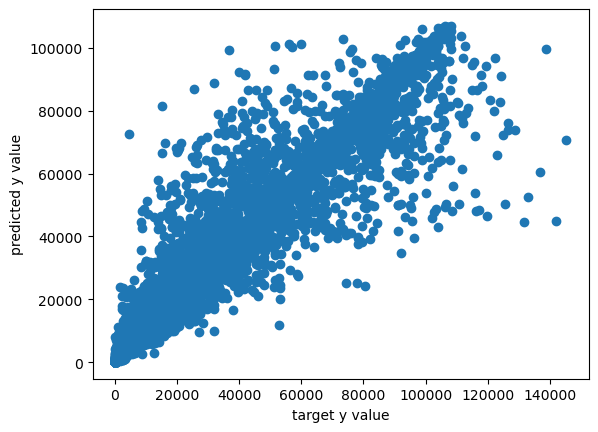

In [29]:
plt.scatter(y_test,y_pred)
plt.xlabel("target y value")
plt.ylabel("predicted y value")

In [30]:
pred_final=random_forest.predict(x_test)
MSE=mean_squared_error(pred_final,y_test)
r2_score=r2_score(y_test,pred_final)

print("pred_final:",pred_final)
print("MSE:",MSE)
print("r2_score:",r2_score)

pred_final: [ 7734.25    119.95  54108.675 ...  2443.5     125.34    123.32 ]
MSE: 67546916.91155918
r2_score: 0.9331123865336063


##### Prediction

In [31]:
print(x.columns)
random_forest.predict([[48,30.46,59,117.39,5.62,9,29,23,55,13,18,13]])

Index(['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)',
       'Speed', 'month', 'day', 'Hour', 'Minute', 'RiseMinute', 'SetHour',
       'SetMinute'],
      dtype='object')


array([897.175])